In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/jena_climate_2009_2016.csv.zip')
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [ ]:
df.isnull().any()

,0
Date Time,False
p (mbar),False
T (degC),False
Tpot (K),False
Tdew (degC),False
rh (%),False
VPmax (mbar),False
VPact (mbar),False
VPdef (mbar),False
sh (g/kg),False


In [ ]:
df_real=df.drop('Date Time',axis=1)

In [ ]:
df['Date Time']=pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [ ]:
# the task is of predicting the temperature, the values closer to the 0 in the correlation matrix can be dropped
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,2009-01-01 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [ ]:
corrm=df_real.corr()
corrm

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


In [ ]:
features=['p (mbar)','wv (m/s)','max. wv (m/s)','wd (deg)']

In [ ]:
for feature in features:
    df=df.drop(feature,axis=1)

In [ ]:
df.head(10)

,Date Time,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3)
0,2009-01-01 00:10:00,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75
1,2009-01-01 00:20:00,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80
2,2009-01-01 00:30:00,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24
3,2009-01-01 00:40:00,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19
4,2009-01-01 00:50:00,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00
5,2009-01-01 01:00:00,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86
6,2009-01-01 01:10:00,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68
7,2009-01-01 01:20:00,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69
8,2009-01-01 01:30:00,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17
9,2009-01-01 01:40:00,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85


In [ ]:
df=df.drop('Date Time',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import math
training_data_len = math.ceil(len(df) * .8)
train_data = df[:training_data_len]
test_data = df[training_data_len:]

In [ ]:
print(len(train_data))
print(len(df))

336441
420551


In [ ]:
X_train=train_data[[i for i in train_data.columns if i not in ['T (degC)']]]

In [ ]:
y_train=train_data['T (degC)'].to_numpy()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate,StratifiedKFold,GridSearchCV,train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=False, random_state=2024)

In [ ]:
X_test=test_data[[i for i in test_data.columns if i not in ['T (degC)']]]
y_test=test_data['T (degC)'].to_numpy()

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:
scaler_2=MinMaxScaler()
y_train=scaler_2.fit_transform(y_train.reshape(-1,1))
y_val=scaler_2.transform(y_val.reshape(-1,1))
y_test=scaler_2.transform(y_test.reshape(-1,1))

In [ ]:
y_train=y_train.reshape(-1)
y_val=y_val.reshape(-1)
y_test=y_test.reshape(-1)

In [ ]:
y_train

array([0.25462884, 0.24800408, 0.24630542, ..., 0.90895193, 0.90793273,
       0.90674367])

In [ ]:
import numpy as np

def sliding_window(X, y, sequence_length,look_ahead):

    X_seq, y_seq = [], []

    for i in range(len(X) - sequence_length-look_ahead+1):
        X_seq.append(X[i:i+sequence_length])
        y_seq.append(y[i+sequence_length+look_ahead-1])

    return np.array(X_seq), np.array(y_seq)


sequence_length = 18  # each hour has 6 readings so we look back into the past for 3 hours
look_ahead=6 # predicting the future value of next hour in the future
X_train_seq, y_train_seq = sliding_window(X_train, y_train, sequence_length,look_ahead)

print(X_train_seq.shape)
print(y_train_seq.shape)


(285951, 18, 9)
(285951,)


In [ ]:
X_val_seq, y_val_seq = sliding_window(X_val, y_val, sequence_length,look_ahead)
print(X_val_seq.shape)

(50444, 18, 9)


In [ ]:
X_test_seq, y_test_seq = sliding_window(X_test, y_test, sequence_length,look_ahead)
print(y_test_seq.shape)
print(X_test_seq.shape)

(84087,)
(84087, 18, 9)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layer,output_size):
        super(LSTM,self).__init__()
        self.lstm=nn.LSTM(input_size,hidden_size,num_layer,dropout=0.2,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)
        self.relu=nn.ReLU()

    def forward(self,x):
        output,_=self.lstm(x)
        output=output[:, -1, :]
        output=self.fc(output)
        output=self.relu(output)
        return output

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
X_train_seq=torch.Tensor(X_train_seq)
y_train_seq=torch.Tensor(y_train_seq)
X_val_seq=torch.Tensor(X_val_seq)
y_val_seq=torch.Tensor(y_val_seq)
X_test_seq=torch.Tensor(X_test_seq)
y_test_seq=torch.Tensor(y_test_seq)

In [ ]:
train_dataset = TensorDataset(X_train_seq, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_dataset = TensorDataset(X_val_seq, y_val_seq)
val_loader= DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataset= TensorDataset(X_test_seq, y_test_seq)
test_loader= DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


**Vanilla Implementation of Approximate Bayesian Computing for hyperparameter Tuning**

In [ ]:
def simulate_model(params, train_loader, val_loader):
    # Extract parameters
    learning_rate, hidden_size = params # these are the parameter which I am trying to estimate using ABC
                                        # approximate Bayesian Computation

    # Define the model
    model = LSTM(input_size=9, hidden_size=int(hidden_size),num_layer=2,output_size=1)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    validation=0
    training=0
    # Train for a few steps
    model.to(device)
    model.train()
    for epoch in range(3):  # Small number of epochs for simplicity
        for X_batch, y_batch in train_loader:
            X_batch=X_batch.to(device)
            y_batch=y_batch.to(device)
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            training+=loss.item()
    print(f"Epoch {epoch + 1}, Loss: {training/len(train_loader)}")
    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val=X_val.to(device)
            y_val=y_val.to(device)
            predictions = model(X_val)
            val_loss = criterion(predictions.squeeze(), y_val)
            validation+=val_loss.item()
    return validation/len(val_loader)  # Return validation loss


In [ ]:
def distance_function(simulated_loss, target_loss):
    return abs(simulated_loss - target_loss)  # Euclidean distance

In [ ]:
def abc_optimization(target_loss, train_loader, val_loader,
                     bounds, n_samples=50, threshold=0.1):
    accepted_params = []

    for _ in range(n_samples):
        learning_rate = np.random.uniform(bounds[0][0], bounds[0][1]) # sampling the parameter values from a uniform distribution
        hidden_size = np.random.uniform(bounds[1][0], bounds[1][1])
        params = [learning_rate, hidden_size]

        # This is the simulation against which the parameters are compared
        simulated_loss = simulate_model(params, train_loader, val_loader)

        # Calculate the distance
        dist = distance_function(simulated_loss, target_loss)

        if dist < threshold:
            accepted_params.append((params, simulated_loss))
            print(f"Accepted params: {params}, Simulated Loss: {simulated_loss}")

    return accepted_params


In [ ]:
bounds = [
    [1e-4, 1e-2],  # Learning rate
    [30, 40]       # Hidden size
]

# Target loss
target_loss = 0.001

accepted_params = abc_optimization(target_loss, train_loader, val_loader,
                                    bounds, n_samples=20, threshold=0.0006)

print("Accepted Parameters:", accepted_params)


Epoch 3, Loss: 0.0033421514296572102
Accepted params: [0.007697842327743699, 34.98161823854931], Simulated Loss: 0.0013829651609653564
Epoch 3, Loss: 0.9407807645961094
Epoch 3, Loss: 0.008603996361643064
Accepted params: [0.008661135229356035, 30.968749935019922], Simulated Loss: 0.0015134675799211505
Epoch 3, Loss: 0.9407807645961094
Epoch 3, Loss: 0.0925518727693884
Accepted params: [0.0008777685392063944, 37.56460249882991], Simulated Loss: 0.0009533220009538414
Epoch 3, Loss: 0.0036321146469139964
Accepted params: [0.004683130004939301, 34.0161434172909], Simulated Loss: 0.0011054976502545037
Epoch 3, Loss: 0.0016176103341756518
Accepted params: [0.0009384649147607524, 36.76588590428474], Simulated Loss: 0.0011251870601258975
Epoch 3, Loss: 0.9407807645961094
Epoch 3, Loss: 0.002799088416275741
Accepted params: [0.005989869249264704, 30.14429352983032], Simulated Loss: 0.0012527633800481224
Epoch 3, Loss: 0.0039685031217753805
Accepted params: [0.006054354030818199, 30.90783126498

Now since we have the accepted parameters its we can train the model using those values and plot the graphs

In [ ]:
## training loop
model = LSTM(input_size=9, hidden_size=36,num_layer=2,output_size=1)
learning_rate=0.0009384649147607524
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
validation=0
training=0
    # Train for a few steps
model.to(device)
model.train()
for epoch in range(3):  # Small number of epochs for simplicity
        for X_batch, y_batch in train_loader:
            X_batch=X_batch.to(device)
            y_batch=y_batch.to(device)
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            training+=loss.item()
        print(f"Epoch {epoch + 1}, Loss: {training/len(train_loader)}")


Epoch 1, Loss: 0.0008230374748155582
Epoch 2, Loss: 0.001228404465279706
Epoch 3, Loss: 0.0015763522302811753


In [ ]:
model.eval()
with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val=X_val.to(device)
            y_val=y_val.to(device)
            predictions = model(X_val)
            val_loss = criterion(predictions.squeeze(), y_val)
            validation+=val_loss.item()

print(f"validation loss is:{validation/len(val_loader)}")

validation loss is:0.0010955672855799863


**Test Results**

In [ ]:
import matplotlib.pyplot as plt

all_predictions = []
all_actuals = []

model.eval()
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        predictions = model(X_test).squeeze()

        all_predictions.extend(predictions.cpu().numpy())
        all_actuals.extend(y_test.cpu().numpy())


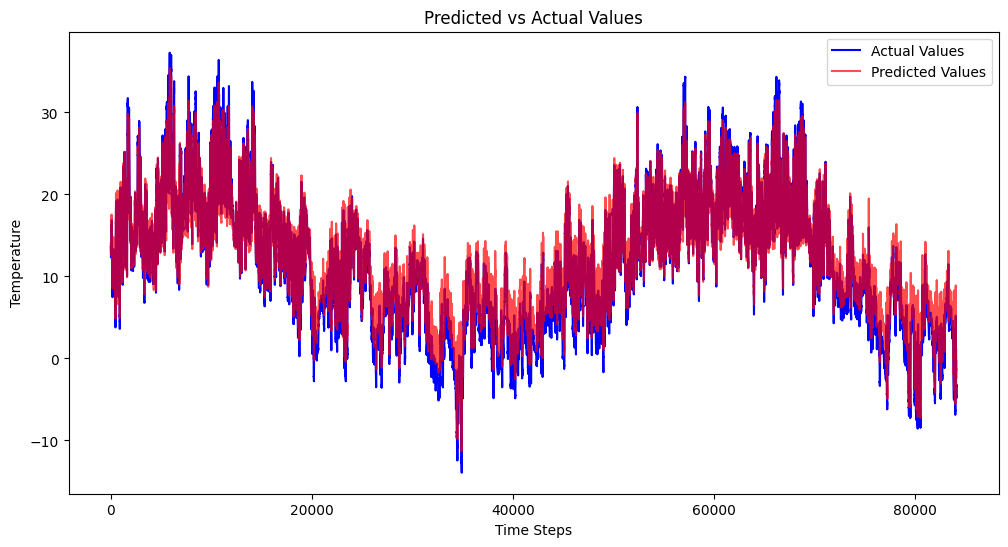

In [ ]:
all_predictions = scaler_2.inverse_transform(np.array(all_predictions).reshape(-1, 1))
all_actuals = scaler_2.inverse_transform(np.array(all_actuals).reshape(-1, 1))

all_predictions = all_predictions.flatten()
all_actuals = all_actuals.flatten()

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(all_actuals, label="Actual Values", color='blue')
plt.plot(all_predictions, label="Predicted Values", color='red', alpha=0.7)
plt.title("Predicted vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()

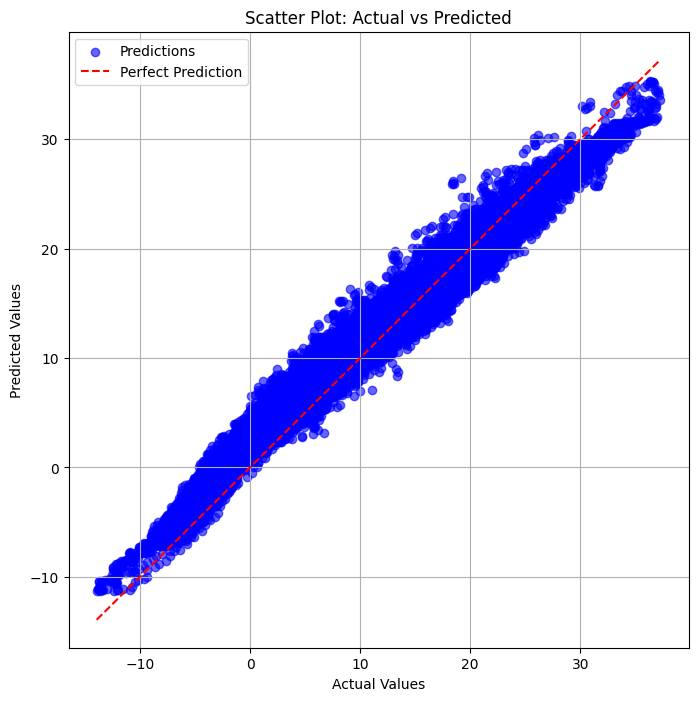

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(all_actuals, all_predictions, alpha=0.6, color='blue', label="Predictions")
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)],
         color='red', linestyle='--', label="Perfect Prediction")
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
error=mae(all_predictions,all_actuals)
print(error)

1.4775602


In [ ]:
from sklearn.metrics import mean_squared_error as mse
error=mse(all_predictions,all_actuals)
print(error)

3.291228
